In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy.fft import fftfreq, fft2, ifft2

In [2]:
from scipy.io import loadmat

## Loading Synthetic Images

In [3]:
photos = loadmat("Photos.mat")

In [4]:
I = np.array([photos["I1"],photos["I2"],photos["I3"],photos["I4"]])

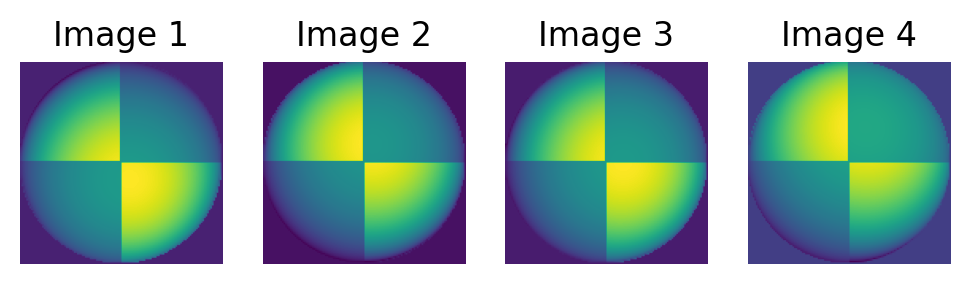

In [5]:
%matplotlib inline
i = 1
plt.figure(dpi = 200)
for p in I:
    plt.subplot(1,4,i)
    plt.imshow(p)
    plt.axis("off")
    plt.title('Image ' + str(i))
    i+=1
plt.show()


## Light Source Components

In [6]:
V1 = [0.085832, 0.17365, 0.98106]
V2 = [0.085832, -0.17365, 0.98106]
V3 = [0.17365, 0, 0.98481]
V4 = [0.16318, -0.34202, 0.92542]

In [7]:
V = np.array([V1,V2,V3,V4])

## Surface Normal Recovery

### Least Square Estimation

In [8]:
g = np.matmul(np.linalg.inv(np.matmul(V.T,V)),V.T).dot(I.swapaxes(0, 1))

### Normalization

In [9]:
n = g/g.size

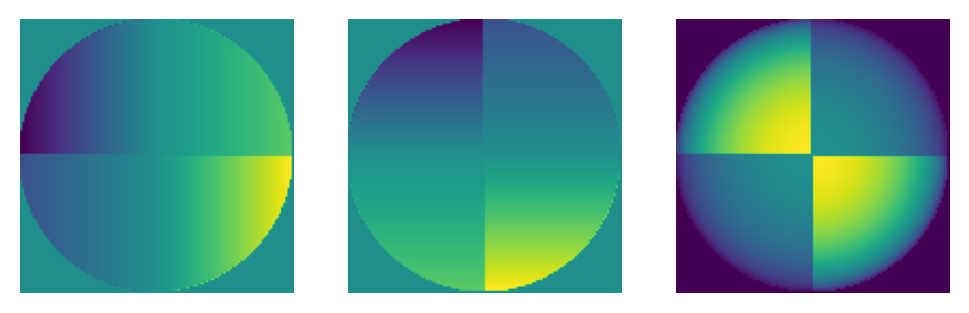

In [10]:
plt.figure(dpi = 200)
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(g[i])
    plt.axis("off")
plt.show()

### Surface Normals

In [11]:
nx, ny, nz = g[0], g[1], g[2]

### Partial Derivatives

In [12]:
dfdx = np.nan_to_num(-nx/nz)
dfdy = np.nan_to_num(-ny/nz)

/var/folders/rk/gz59x8xx0bz69pn391mjkglw0000gn/T/ipykernel_26998/2687753632.py:1: RuntimeWarning: invalid value encountered in true_divide
  dfdx = np.nan_to_num(-nx/nz)
/var/folders/rk/gz59x8xx0bz69pn391mjkglw0000gn/T/ipykernel_26998/2687753632.py:2: RuntimeWarning: invalid value encountered in true_divide
  dfdy = np.nan_to_num(-ny/nz)


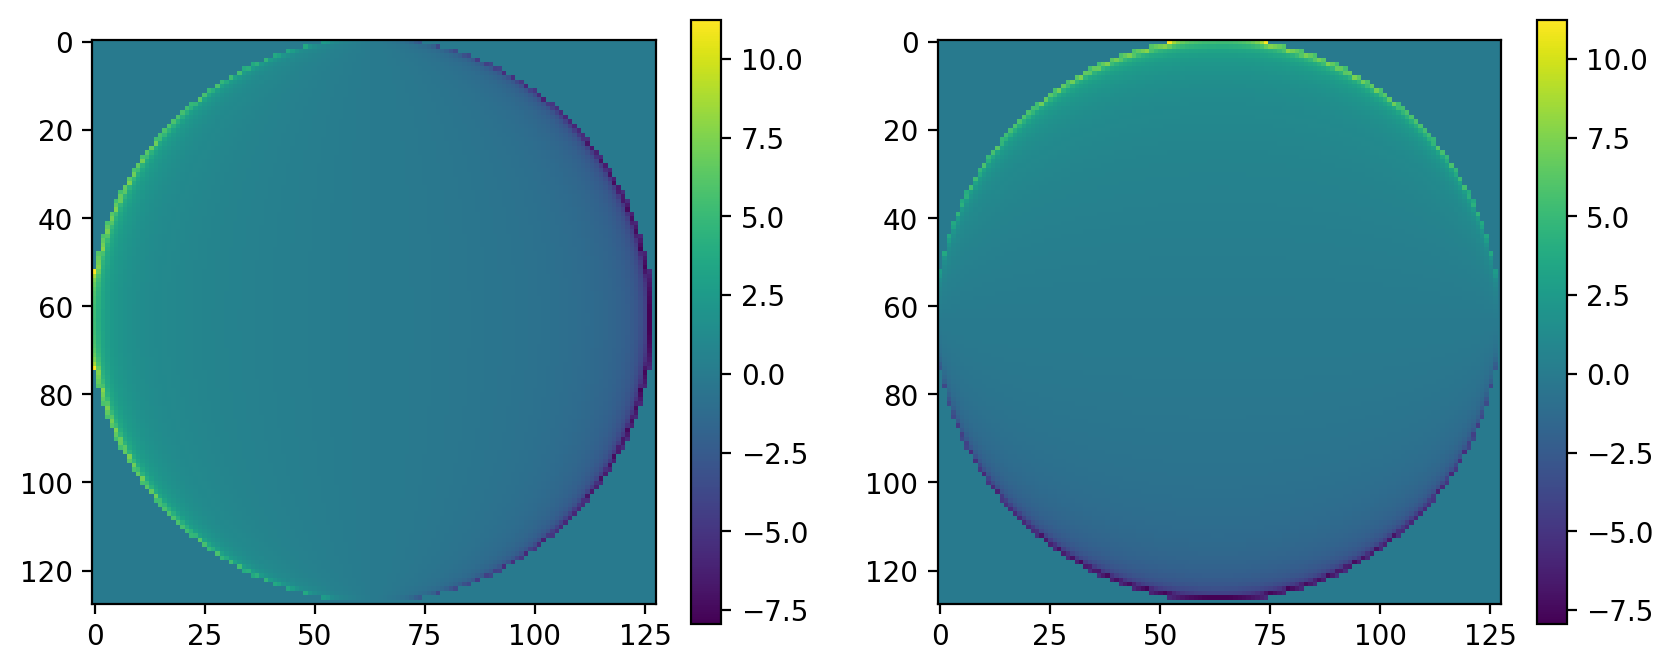

In [13]:
plt.figure(figsize = [10,4],dpi = 200)
plt.subplot(1,2,1)
plt.imshow(dfdx)
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(dfdy)
plt.colorbar()

## Recovered Surface

### via Line Integral Evaluation

In [14]:
DX = np.zeros(shape=[128, 128])
DY = np.zeros(shape=[128, 128])

for i in range(128):
    for j in range(128):
        X = np.sum(dfdx[i,:j])
        Y = np.sum(dfdy[:i,j])
        
        DX[i,j] = X
        DY[i,j] = Y

<IPython.core.display.Javascript object>


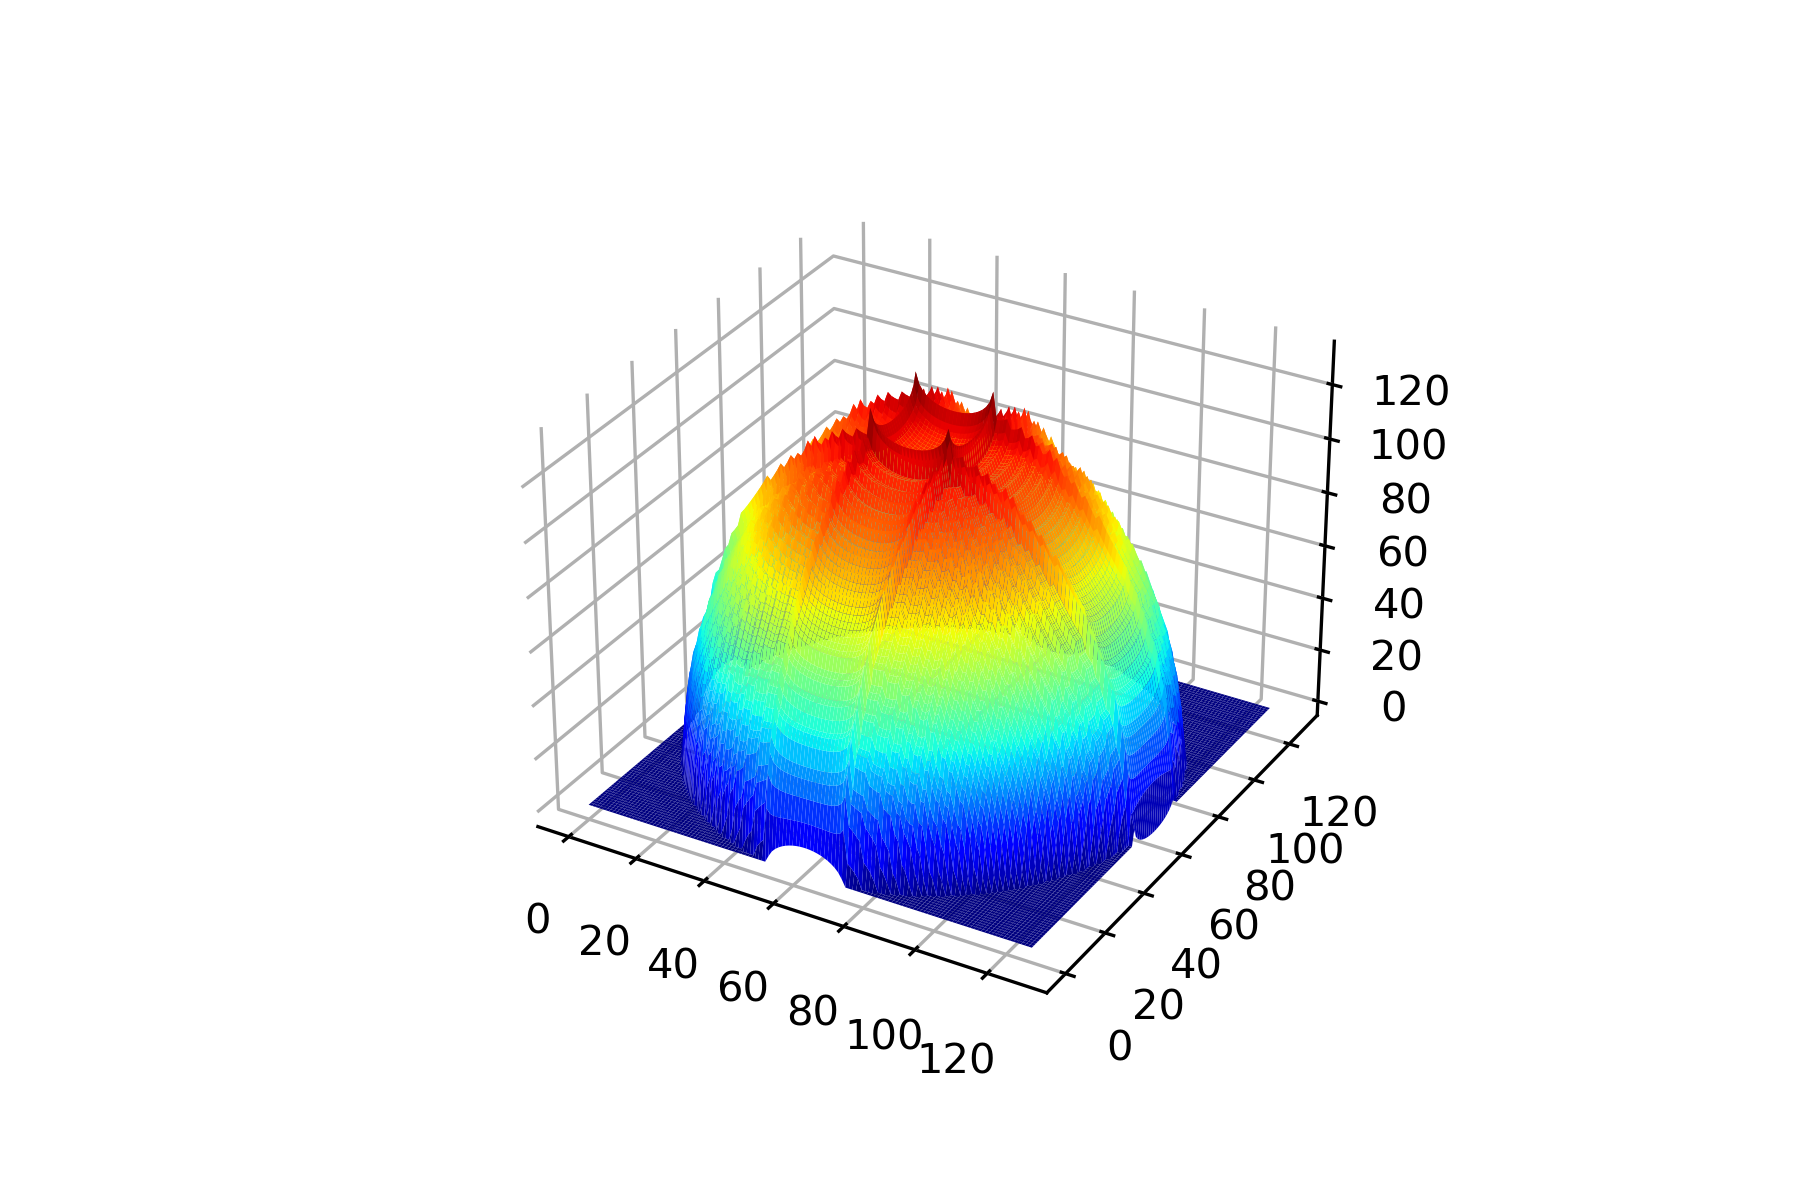

In [15]:
%matplotlib notebook
F = DX+DY
x = np.arange(0,128)
X,Y = np.meshgrid(x,x)

fig = plt.figure(figsize = [6,4], dpi = 150)
plt.rcParams.update({'font.size': 10})
ax = fig.add_subplot(111, projection='3d')
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

p = ax.plot_surface(X, Y, F, cmap = 'jet', rstride=1, cstride=1)

### via Frankot-Chellapa Algorithm

In [16]:
dim = 128
wx, wy = np.meshgrid(fftfreq(dim)*2*np.pi, fftfreq(dim)*2*np.pi,
                    indexing = 'xy')
xx, yy = np.meshgrid(np.arange(128),np.arange(128))
num = -1j*wx*fft2(dfdx) - 1j*wy*fft2(dfdy)
den = wx**2 + wy**2 + np.finfo(float).eps
res = ifft2(num/den)
res -= np.mean(res.real)

<IPython.core.display.Javascript object>


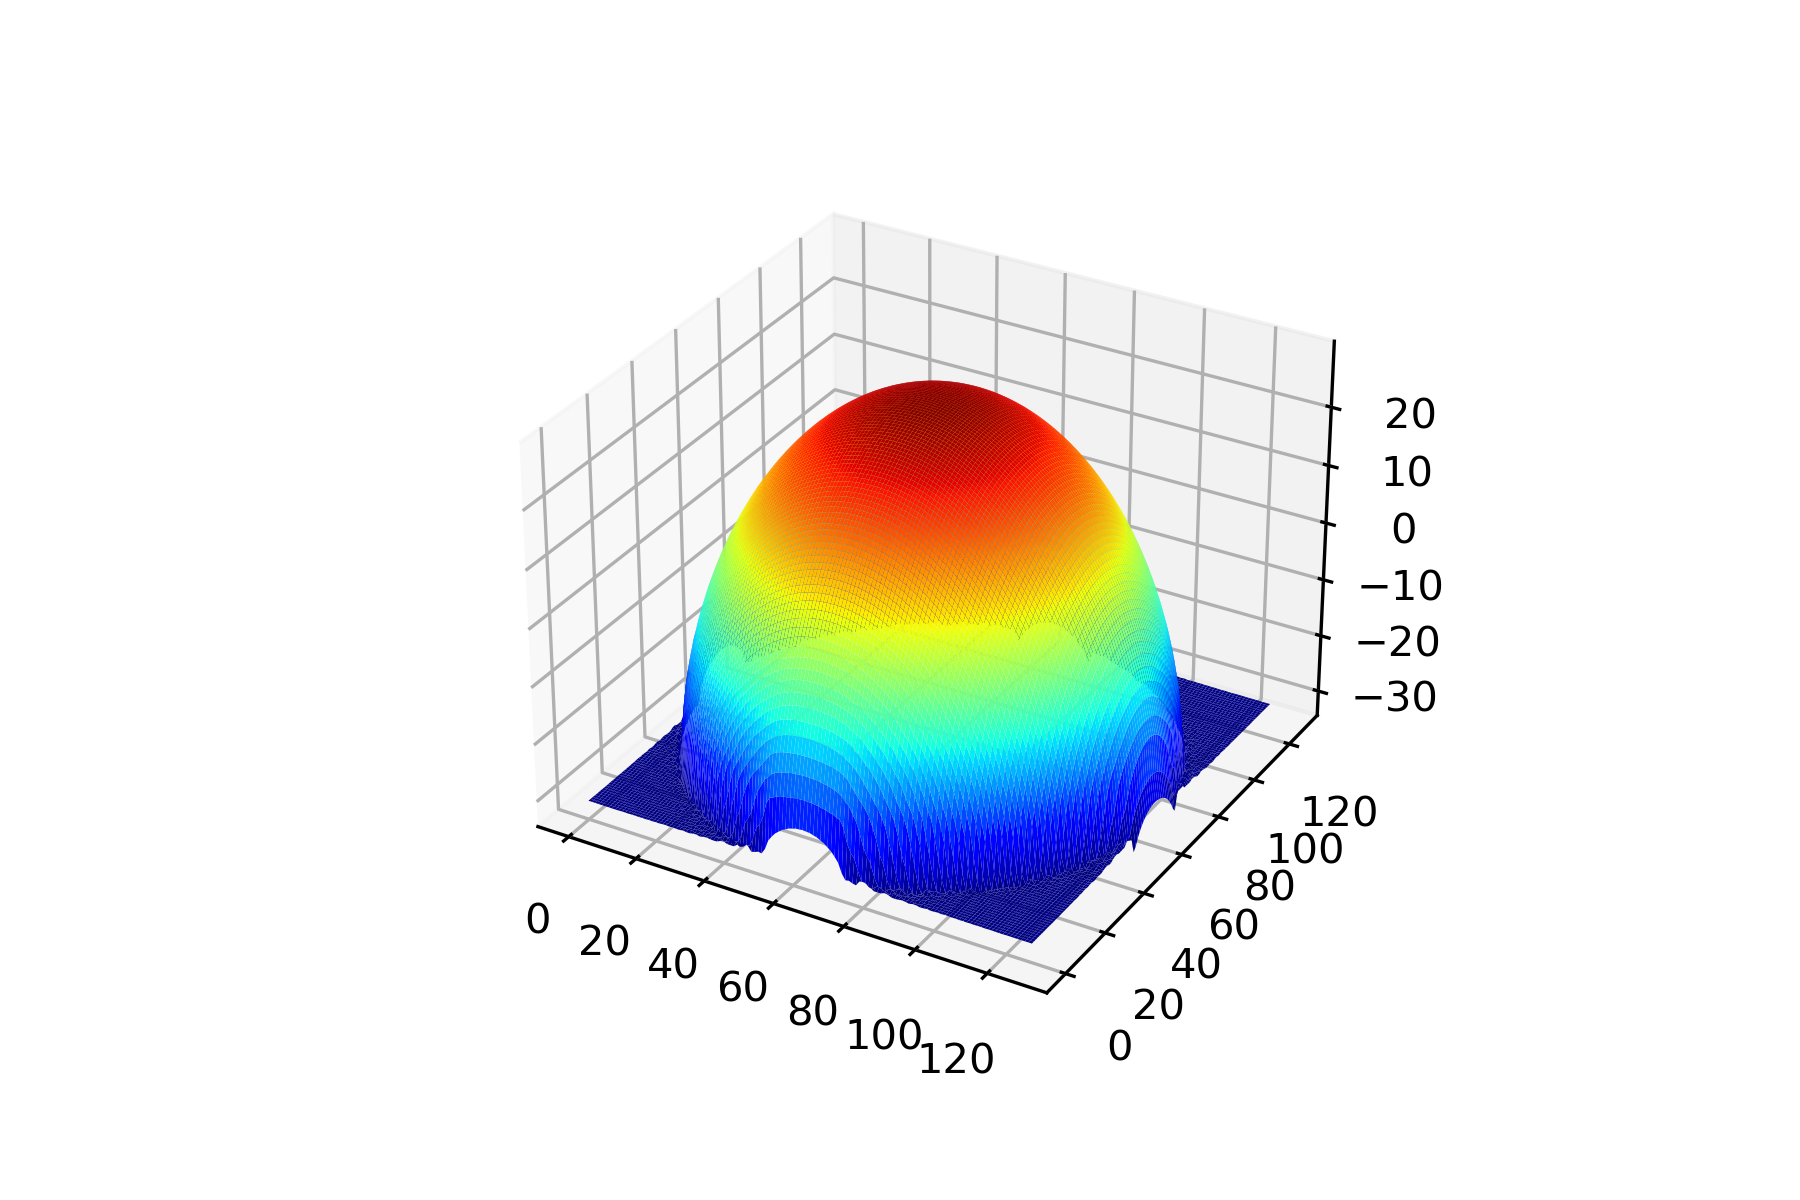

In [17]:
%matplotlib notebook
F = DX+DY
x = np.arange(0,128)
X,Y = np.meshgrid(x,x)

fig = plt.figure(figsize = [6,4], dpi = 150, facecolor = 'w')
plt.rcParams.update({'font.size': 10})
ax = fig.add_subplot(111, projection='3d')
p = ax.plot_surface(X, Y, res.real, cmap = 'jet', rstride=1, cstride=1)

<IPython.core.display.Javascript object>


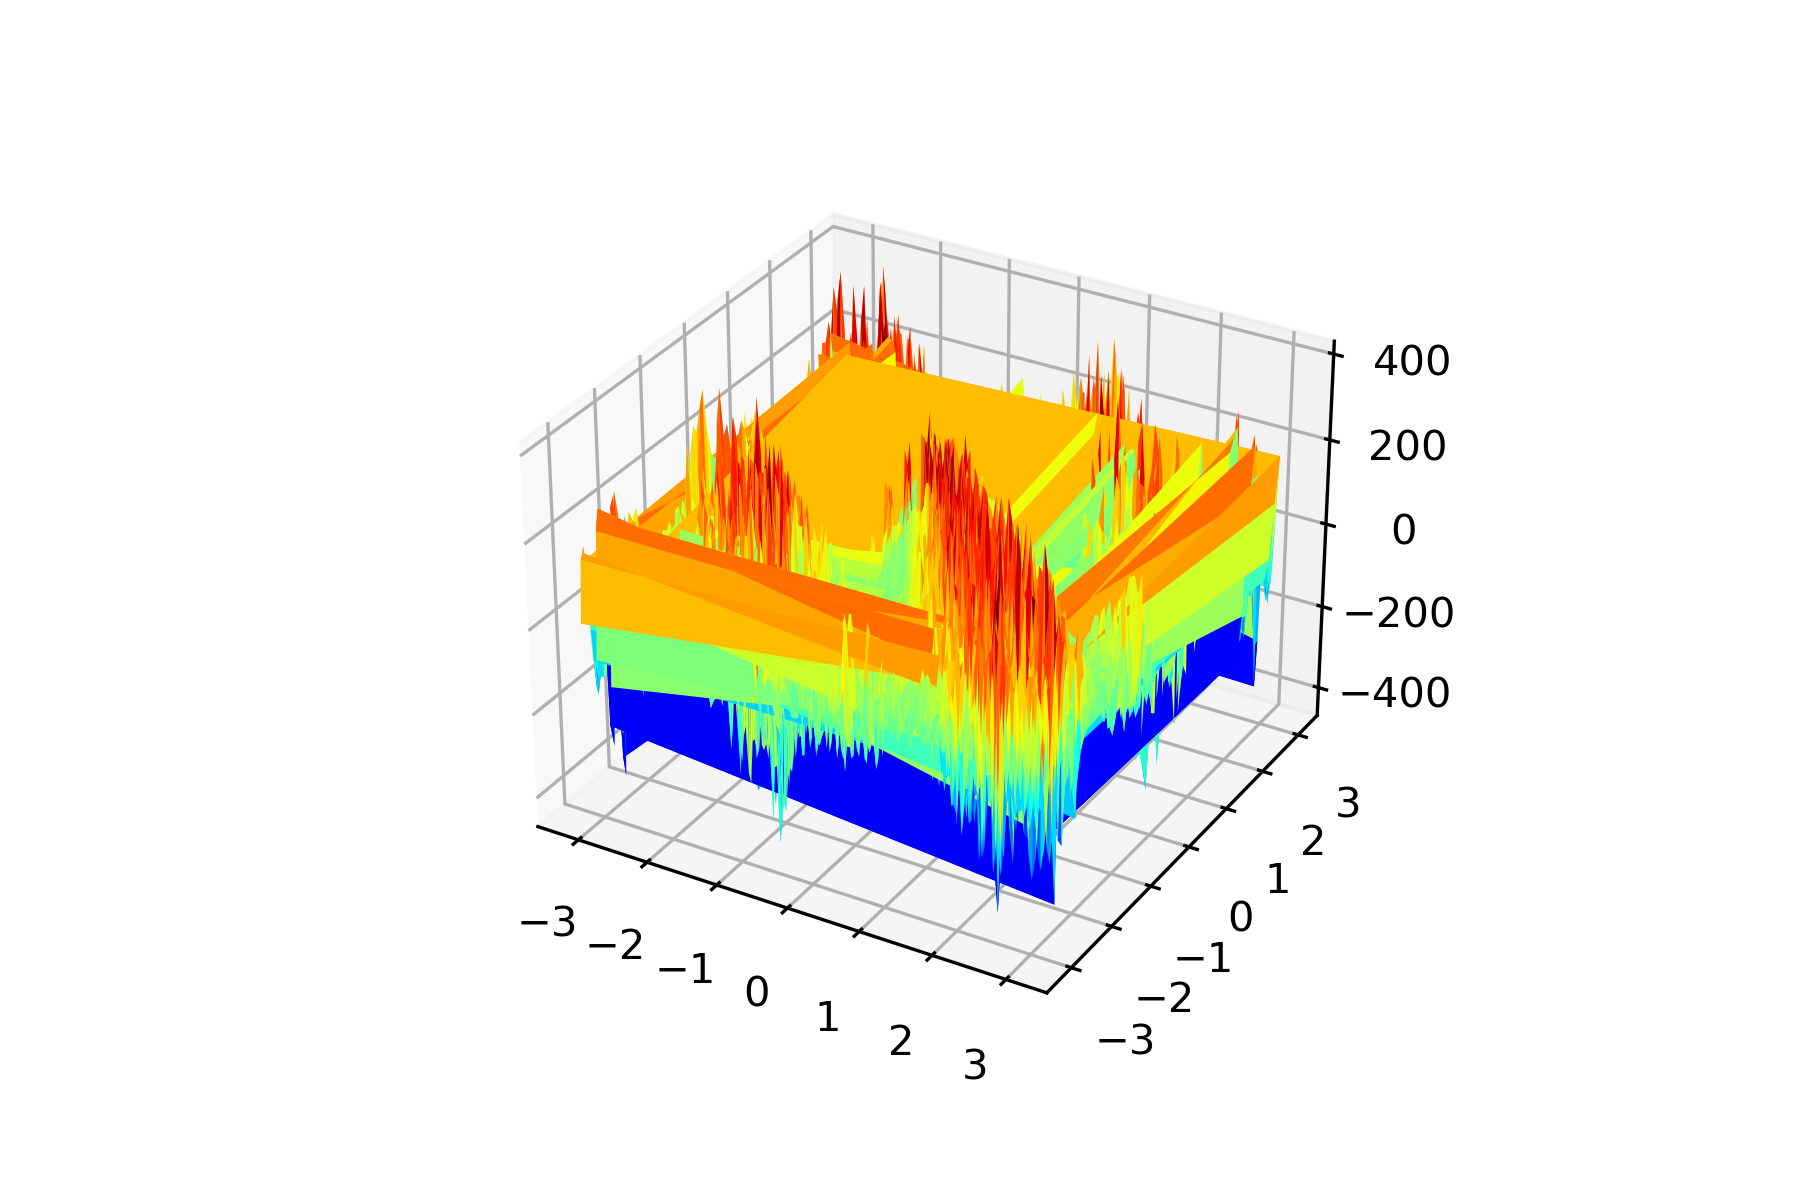

In [18]:
fig = plt.figure(figsize = [6,4], dpi = 150, facecolor = 'w')
plt.rcParams.update({'font.size': 10})
ax = fig.add_subplot(111, projection='3d')
p = ax.plot_surface(wx, wy, num.real, cmap = 'jet', rstride=1, cstride=1)